In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | japura
Processing Record 2 of Set 1 | kautokeino
Processing Record 3 of Set 1 | abu samrah
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | jahrom
City not found. Skipping...
Processing Record 8 of Set 1 | villarrica
Processing Record 9 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | norman wells
Processing Record 12 of Set 1 | cabo san lucas
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | rocha
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | santarem
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | gondanglegi
Processing Record 21 of Set 1 | vila franca do campo
Processing 

Processing Record 38 of Set 4 | nigde
Processing Record 39 of Set 4 | bengkulu
Processing Record 40 of Set 4 | bethel
Processing Record 41 of Set 4 | geraldton
Processing Record 42 of Set 4 | yola
Processing Record 43 of Set 4 | guerrero negro
Processing Record 44 of Set 4 | kashan
Processing Record 45 of Set 4 | manggar
Processing Record 46 of Set 4 | luxor
Processing Record 47 of Set 4 | kodiak
Processing Record 48 of Set 4 | saskylakh
Processing Record 49 of Set 4 | abha
Processing Record 50 of Set 4 | isangel
Processing Record 1 of Set 5 | batemans bay
Processing Record 2 of Set 5 | zigong
Processing Record 3 of Set 5 | saint-francois
Processing Record 4 of Set 5 | zabaykalsk
Processing Record 5 of Set 5 | suluova
Processing Record 6 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 5 | umm lajj
Processing Record 8 of Set 5 | trairi
Processing Record 9 of Set 5 | warqla
City not found. Skipping...
Processing Record 10 of Set 5 | mergui
City not found. Sk

Processing Record 30 of Set 8 | riyadh
Processing Record 31 of Set 8 | missoula
Processing Record 32 of Set 8 | balikpapan
Processing Record 33 of Set 8 | carire
Processing Record 34 of Set 8 | kurgunta
Processing Record 35 of Set 8 | bahia honda
Processing Record 36 of Set 8 | arona
Processing Record 37 of Set 8 | uusikaupunki
Processing Record 38 of Set 8 | thessalon
Processing Record 39 of Set 8 | boyolangu
Processing Record 40 of Set 8 | netivot
Processing Record 41 of Set 8 | alugan
Processing Record 42 of Set 8 | santa comba
Processing Record 43 of Set 8 | olafsvik
Processing Record 44 of Set 8 | tirumullaivasal
Processing Record 45 of Set 8 | hamilton
Processing Record 46 of Set 8 | nichinan
Processing Record 47 of Set 8 | san luis
Processing Record 48 of Set 8 | leh
Processing Record 49 of Set 8 | hokitika
Processing Record 50 of Set 8 | lorengau
Processing Record 1 of Set 9 | grindavik
Processing Record 2 of Set 9 | ust-ishim
Processing Record 3 of Set 9 | ixtapa
Processing Re

Processing Record 17 of Set 12 | ulaangom
Processing Record 18 of Set 12 | santa maria
Processing Record 19 of Set 12 | longlac
City not found. Skipping...
Processing Record 20 of Set 12 | ransang
Processing Record 21 of Set 12 | eyl
Processing Record 22 of Set 12 | vila velha
Processing Record 23 of Set 12 | huarmey
Processing Record 24 of Set 12 | titisee-neustadt
Processing Record 25 of Set 12 | nabire
Processing Record 26 of Set 12 | tigzirt
Processing Record 27 of Set 12 | hofn
Processing Record 28 of Set 12 | vavatenina
Processing Record 29 of Set 12 | selma
Processing Record 30 of Set 12 | xushan
Processing Record 31 of Set 12 | mokhsogollokh
Processing Record 32 of Set 12 | bow island
Processing Record 33 of Set 12 | san jeronimo
Processing Record 34 of Set 12 | quelimane
Processing Record 35 of Set 12 | banda aceh
Processing Record 36 of Set 12 | huanren
Processing Record 37 of Set 12 | lavras da mangabeira
Processing Record 38 of Set 12 | querfurt
Processing Record 39 of Set 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Japura,-0.3167,102.3500,73.60,98,99,1.61,ID,2021-09-25 21:47:59
1,Kautokeino,69.0125,23.0412,40.91,88,100,3.24,NO,2021-09-25 21:48:00
2,Abu Samrah,35.3029,37.1841,67.75,52,0,2.28,SY,2021-09-25 21:48:00
3,Punta Arenas,-53.1500,-70.9167,44.71,53,40,23.02,CL,2021-09-25 21:46:28
4,Jamestown,42.0970,-79.2353,65.08,77,90,11.50,US,2021-09-25 21:47:31
5,Mataura,-46.1927,168.8643,43.48,91,53,6.44,NZ,2021-09-25 21:44:53
6,Villarrica,-25.7500,-56.4333,72.10,32,0,5.84,PY,2021-09-25 21:48:00
7,Ushuaia,-54.8000,-68.3000,42.46,65,40,17.27,AR,2021-09-25 21:48:01
8,Norman Wells,65.2820,-126.8329,35.64,93,90,16.11,CA,2021-09-25 21:48:01
9,Cabo San Lucas,22.8909,-109.9124,95.50,70,16,7.16,MX,2021-09-25 21:47:17


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Japura,ID,2021-09-25 21:47:59,-0.3167,102.3500,73.60,98,99,1.61
1,Kautokeino,NO,2021-09-25 21:48:00,69.0125,23.0412,40.91,88,100,3.24
2,Abu Samrah,SY,2021-09-25 21:48:00,35.3029,37.1841,67.75,52,0,2.28
3,Punta Arenas,CL,2021-09-25 21:46:28,-53.1500,-70.9167,44.71,53,40,23.02
4,Jamestown,US,2021-09-25 21:47:31,42.0970,-79.2353,65.08,77,90,11.50
5,Mataura,NZ,2021-09-25 21:44:53,-46.1927,168.8643,43.48,91,53,6.44
6,Villarrica,PY,2021-09-25 21:48:00,-25.7500,-56.4333,72.10,32,0,5.84
7,Ushuaia,AR,2021-09-25 21:48:01,-54.8000,-68.3000,42.46,65,40,17.27
8,Norman Wells,CA,2021-09-25 21:48:01,65.2820,-126.8329,35.64,93,90,16.11
9,Cabo San Lucas,MX,2021-09-25 21:47:17,22.8909,-109.9124,95.50,70,16,7.16


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

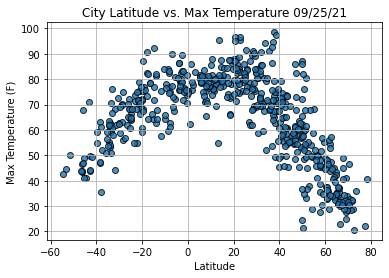

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

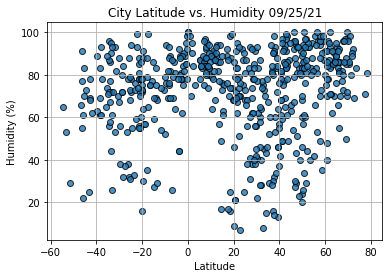

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

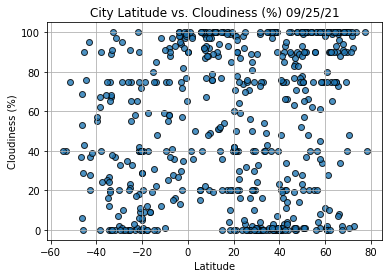

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

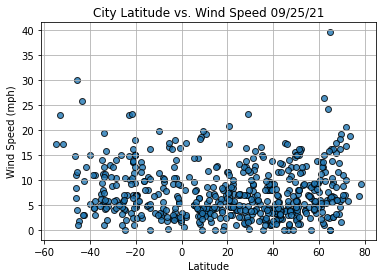

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()